## Project Title: Heart Disease UCI 
---
## Dataset:

Link: https://www.kaggle.com/ronitf/heart-disease-uci 

Desciption: *This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.* 


---
### Implememted in our Notebook:
1. Dataset Loading
2. Dataset Exploration & Visualization
3. Data Preprocessing (Discretization & Normalization) 
4. K-Means Clustering
5. SVM Classification 
6. Decision Tree Classification
7. Random Forest Classification (Extra)
---
 

# 1. Packages Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import gzip
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from matplotlib.image import imread
from sklearn import metrics
from numpy.linalg import norm
from sklearn import neighbors

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 2. Importing Dataset

### 2.1 Setting up Google Drive Downloader to download Dataset

In [8]:
pip install googledrivedownloader

In [9]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='17Hk9Snja7qZPU43Qzt3WGDLMR1Xdb9Hi', dest_path='./heart.csv')

### 2.3 Read Dataset

In [10]:
df = pd.read_csv("heart.csv")

# 3. Data Exploration

### 3.1 Data Columns & Sample

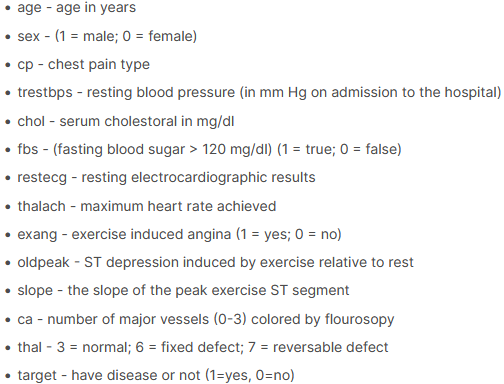

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 3.2 Plot Target (Heart Desease or Not) Frequencies

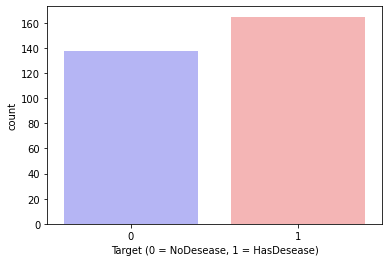

In [12]:
sns.countplot(x="target", data=df, palette="bwr")
plt.xlabel("Target (0 = NoDesease, 1 = HasDesease)")
plt.show()

### 3.3 Plot Male/Female Frequencies

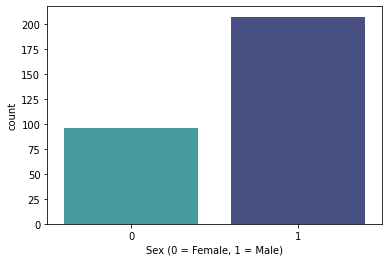

In [13]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.show()

### 3.4 Visualizing Heart Diseases by Age

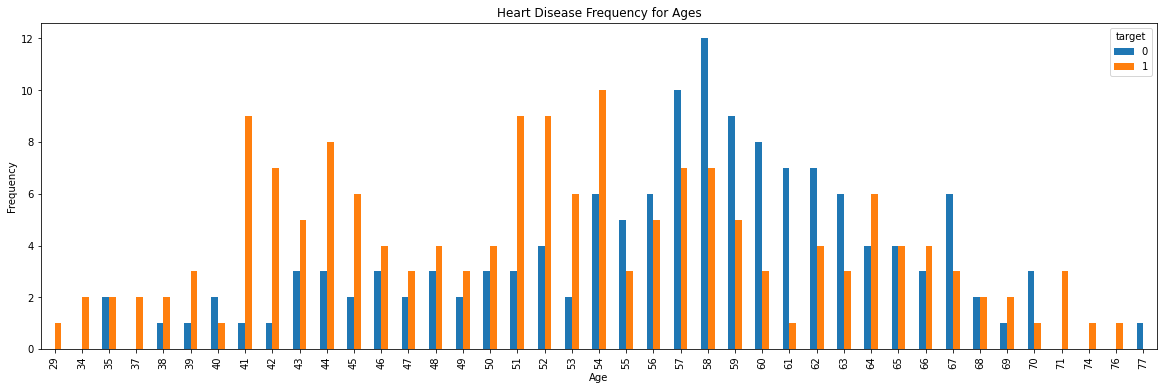

In [14]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

### 3.5 Data Scatter Plot (Disease, Heart Rate, & Age)

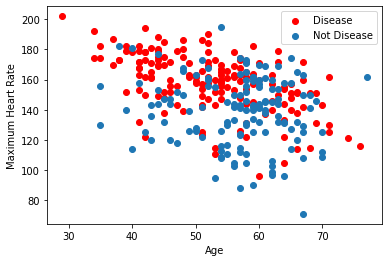

In [15]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# 4. Data Preprocessing

### 4.1 Descretizing Categorial Variables

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [16]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


Dropping the categorial variables 'cp', 'thal' and 'slope' 

In [17]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


### 4.2 Data Normalization

In [18]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

### 4.3 Splitting Dataset to Train & Test Samples (80%, 20%)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

# 5. Unsupervised Learning (Clustering)

## 5.1 K-Means Clustering

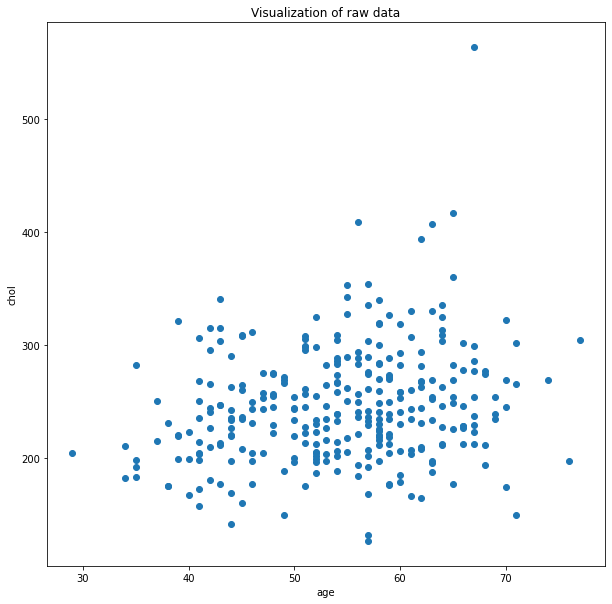

In [20]:
# Plot the data
plt.figure(figsize=(10, 10))
features = ['age',	'sex',	'trestbps',	'chol',	'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0',	'slope_1', 'slope_2',	'cp_0',	'cp_1',	'cp_2',	'cp_3',	'thal_0',	'thal_1',	'thal_2',	'thal_3', 'slope_0', 'slope_1', 'slope_2']
X = df['age']
y = df['chol']
plt.scatter(X, y)
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Visualization of raw data');

Use a subset of the data to start k-means exploration

In [21]:
data = df[['age', 'chol']]
data.shape

(303, 2)

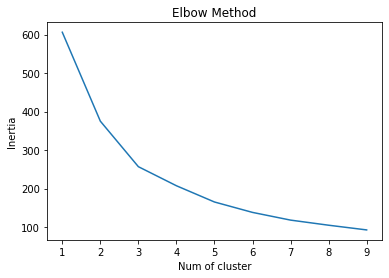

In [22]:
#uses sklearn kMeans
# Standardize the the small data set
X_std = StandardScaler().fit_transform(data)

#use elbow graph to see how many clusters might work
elbow = []
for i in range(1,10):
    km = KMeans(n_clusters = i, max_iter = 20, random_state = 42)
    km.fit(X_std)
    elbow.append(km.inertia_)

#Plot cluster
plt.plot(range(1,10), elbow)
plt.xlabel('Num of cluster')
plt.title('Elbow Method')
plt.ylabel('Inertia')
plt.show()

In [23]:
# Run sklearn KMeans: on samll data set here
km = KMeans(n_clusters=3, max_iter=500, random_state = 42)
km.fit(X_std)

KMeans(max_iter=500, n_clusters=3, random_state=42)

Data Clusters Centroids

In [24]:
centroids = km.cluster_centers_
centroids

array([[ 0.56294192, -0.54069438],
       [-1.15211421, -0.30406765],
       [ 0.57406348,  1.12796899]])

Plot the clustered data

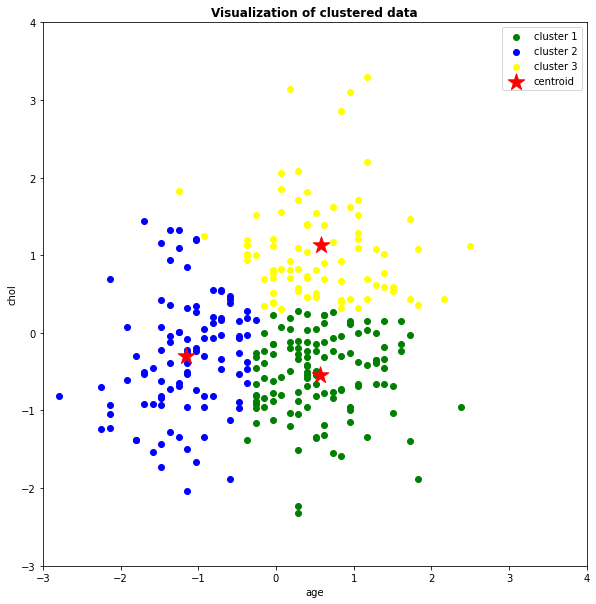

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='yellow', label='cluster 3')
#plt.scatter(X_std[km.labels_ == 3, 0], X_std[km.labels_ == 3, 1], c='orange', label='cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

Evaluating Model Accuracy

In [26]:
clf_kmeans = neighbors.KNeighborsClassifier()
clf_kmeans.fit(x_train.T, y_train.T)
accuracy=clf_kmeans.score(x_test.T, y_test.T)*100
print("Test Accuracy of KMEANS Algorithm: {:.2f}%".format(accuracy))

Test Accuracy of KMEANS Algorithm: 85.25%


Model Classification Report (Precision, Recall, F1-Score)

In [27]:
from sklearn.metrics import classification_report
y_pred = clf_kmeans.predict(x_test.T)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.90      0.82      0.86        34

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



# 6. Supervised Learning (Classification)

## 6.1 Using Support Vector Machines

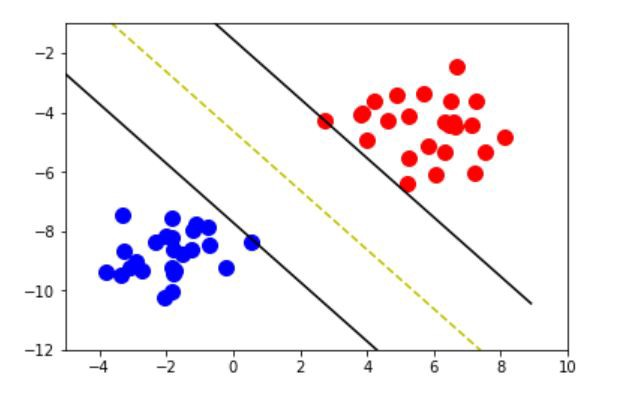

Import SVM from Scikit Learn

In [28]:
from sklearn.svm import SVC

Train SVM on Training Data

In [29]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

SVC(random_state=1)

Evaluate SVM Model

In [30]:
svm_accuracy = svm.score(x_test.T,y_test.T)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm_accuracy))

Test Accuracy of SVM Algorithm: 88.52%


Evaluating Precision, Recall, & F1-Score

In [31]:
from sklearn.metrics import classification_report
y_pred = svm.predict(x_test.T)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



##6.2 Using Decision Tree Classification

Import DecisionTreeClassifier from Scikit Learn

In [32]:
from sklearn import tree

Train Decision Tree on Training Data

In [33]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

DecisionTreeClassifier()

Evaluate DTC Model

In [34]:
dtc_accuracy =  dtc.score(x_test.T,y_test.T)*100
print("Test Accuracy of Decision Tree Algorithm  : {:.2f}%".format(dtc_accuracy))

Test Accuracy of Decision Tree Algorithm  : 80.33%


Evaluating Percision, Recall, & F1-Score

In [35]:
from sklearn.metrics import classification_report
y_pred = dtc.predict(x_test.T)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



Decision Tree Visualization

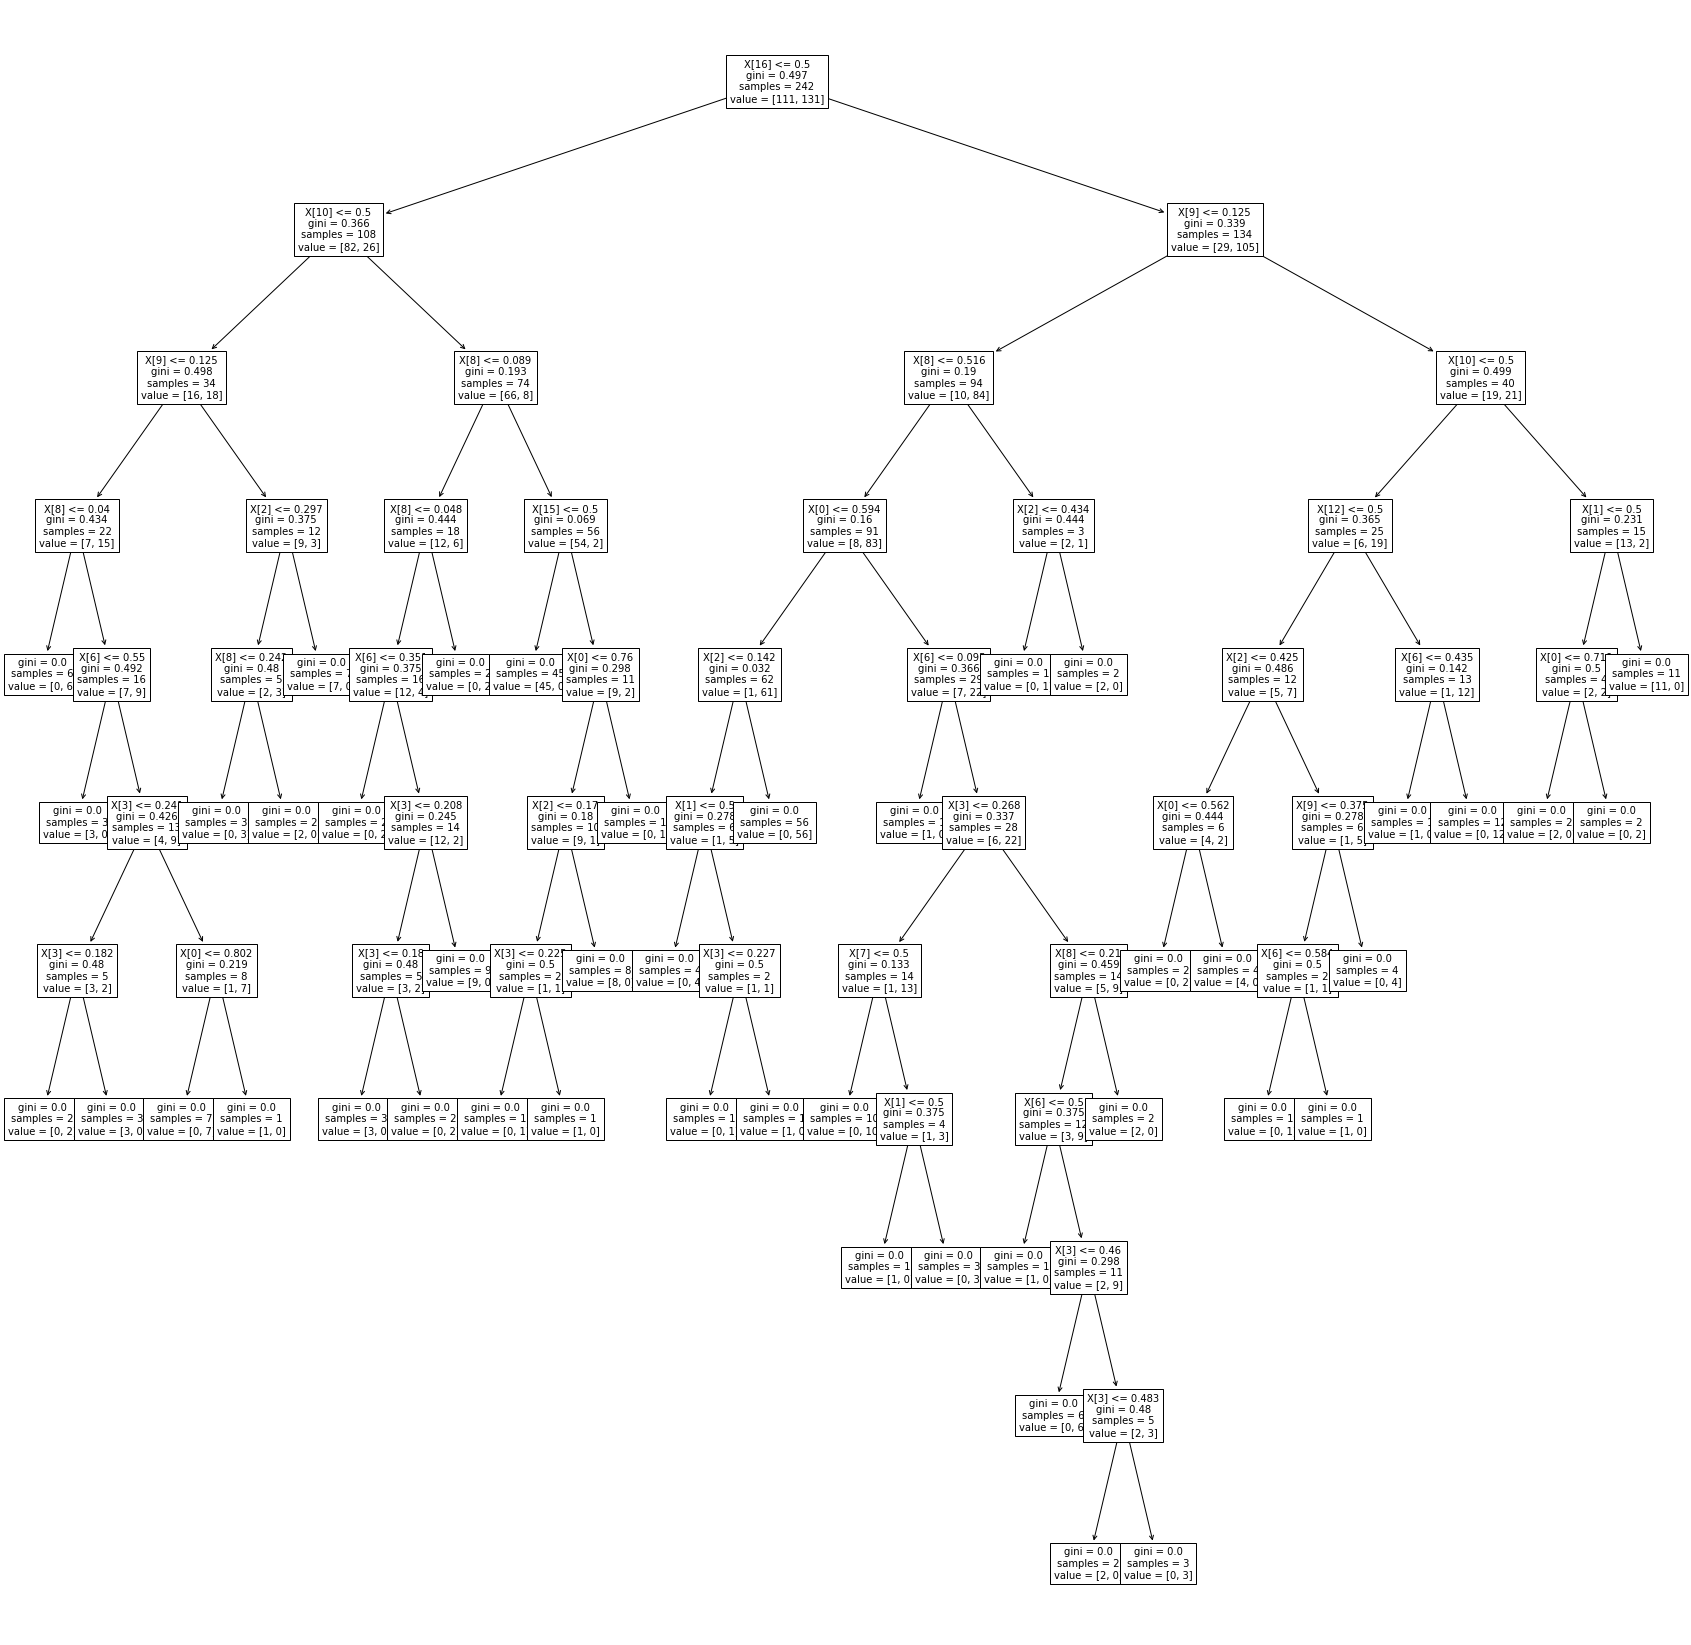

In [36]:
plt.figure(figsize=(30,30))
tree.plot_tree(dtc, fontsize=10)
plt.show()

In [37]:
x_train.T

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
74,0.291667,0.0,0.264151,0.198630,0.0,0.5,0.717557,0.0,0.032258,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
153,0.770833,0.0,0.490566,0.347032,0.0,0.0,0.618321,0.0,0.000000,0.25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
64,0.604167,1.0,0.433962,0.194064,1.0,0.0,0.717557,0.0,0.000000,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
296,0.708333,0.0,0.283019,0.162100,0.0,0.5,0.496183,1.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
287,0.583333,1.0,0.566038,0.242009,0.0,0.0,0.709924,0.0,0.000000,0.25,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.291667,1.0,0.358491,0.276256,1.0,0.0,0.549618,1.0,0.016129,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
192,0.520833,1.0,0.245283,0.141553,0.0,0.5,0.320611,0.0,0.225806,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
117,0.562500,1.0,0.245283,0.152968,0.0,0.0,0.694656,0.0,0.306452,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
47,0.375000,1.0,0.415094,0.299087,0.0,0.0,0.648855,0.0,0.000000,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


##6.3 Using Random Forest Classification (Extra)

Import RandomForestClassifier from Scikit Learn

In [38]:
from sklearn.ensemble import RandomForestClassifier

Train RFC on Training Data

In [39]:
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rfc.fit(x_train.T, y_train.T)

RandomForestClassifier(n_estimators=1000, random_state=1)

Evaluate RFC Model

In [40]:
rfc_accuracy =  rfc.score(x_test.T,y_test.T)*100
print("Test Accuracy of Random Forest Algorithm  : {:.2f}%".format(rfc_accuracy))

Test Accuracy of Random Forest Algorithm  : 88.52%


Evaluating Percision, Recall, & F1-Score

In [41]:
from sklearn.metrics import classification_report
y_pred = rfc.predict(x_test.T)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

